In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
# dataset is read through pandas
dataset=pd.read_csv('D:\Python Data Analysis\salary\Salary_Data.csv')

In [29]:
dataset.shape

(30, 2)

In [30]:
dataset

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


Now, we have to split data into x and y. Years of experience goes to X as it is independent variable and salary into y as it is a dependent variable

In [31]:
X= dataset.iloc[:,0].values # all rows and 0 index column( ie first column)
X


array([ 1.1,  1.3,  1.5,  2. ,  2.2,  2.9,  3. ,  3.2,  3.2,  3.7,  3.9,
        4. ,  4. ,  4.1,  4.5,  4.9,  5.1,  5.3,  5.9,  6. ,  6.8,  7.1,
        7.9,  8.2,  8.7,  9. ,  9.5,  9.6, 10.3, 10.5])

In [32]:
y=dataset.iloc[:,1].values# all rows and 1 index column( ie second column)
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

Our task is to predict y(salary) based on X (years of experience)

# Creating a Linear regression model
We split data into training and testing set because we want to check how our model works when it works with unseen data. test set data are unseen to the model. we use skitlearn for this


In [33]:
print('Shape of X=',X.shape)
print('Shape of y=',y.shape)

Shape of X= (30,)
Shape of y= (30,)


In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=1/3,random_state=51)

In [39]:
X_train=X_train.reshape(-1,1)
y_train=y_train.reshape(-1,1)
X_test=X_test.reshape(-1,1)
y_test=y_test.reshape(-1,1)

In [40]:
print('Shape of X_train=',X_train.shape)
print('Shape of y_train=',y_train.shape)
print('Shape of X_test=',X_test.shape)
print('Shape of X_test=',y_test.shape)

Shape of X_train= (20, 1)
Shape of y_train= (20, 1)
Shape of X_test= (10, 1)
Shape of X_test= (10, 1)


### Sometimes when there are multiple  independent variables (X) where the scale is too high and low. in that case, we can standardize the scale as follows

In [ ]:
#from sklearn.preprocessing import StandardScaler
#sc=StandardScaler()
#sc.fit(X_train)
#X_train=sc.transform(X_train)
#X_test=sc.transform(X_test)

In [41]:
# Train the model by using train data. means, using this train data, it will estimate the patterns . 
# also means it will evaluate the value of m and c ( from y=mx+c)

In [82]:
from sklearn.linear_model import LinearRegression
LRModel=LinearRegression() # regressor object is created
LRModel.fit(X_train,y_train)


LinearRegression()

In [84]:
LRModel.coef_ # our model has learnt the value of coefficient

array([[9523.14578831]])

In [85]:
LRModel.intercept_

array([24006.03576147])

### Here we are testing the model. and trying to find out what is the expected salary of the years of experience that is spared for testing

In [86]:
y_pred=LRModel.predict(X_test) # this is the predicted data (salary) for 1/3 of the total YOE
y_pred

array([[106857.40411979],
       [ 54480.10228407],
       [ 38290.75444394],
       [102095.83122563],
       [ 54480.10228407],
       [115428.23532927],
       [ 70669.4501242 ],
       [ 80192.59591251],
       [ 36386.12528628],
       [ 81144.91049134]])

### Let's compare the above predicted salary with the test data salaries

In [87]:
y_test # this is actual 1/3 test data

array([[109431.],
       [ 64445.],
       [ 37731.],
       [113812.],
       [ 54445.],
       [112635.],
       [ 67938.],
       [ 81363.],
       [ 46205.],
       [ 93940.]])

here, we compare predicted data and the test data, which is very close
Let's plot this

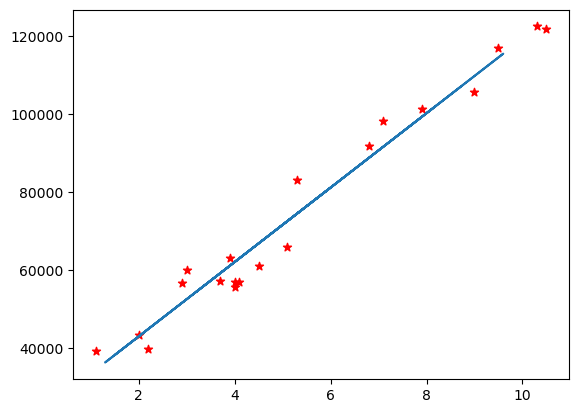

In [81]:
plt.scatter(X_train, y_train,color='red',marker='*')# actual value
plt.plot(X_test,y_pred) # line in the graph is the predicted value
# here y_pred is the variable where the salary of X_test data is assigned

### Now let's check the accuracy of the regression model

In [88]:
LRModel.score(X_test,y_test)

0.9278148083974356

The accuracy of the model is 92 percent

In [69]:
#Now. let's predict the salary of a person who has 11 years of experience

In [90]:
LRModel.predict([[11]])

array([[128760.63943291]])

### I have an excel file with years of experience. Now I want to predict the salaries of all the years listed in that file and save the estimated salary in the same file

In [110]:
YExp_df=pd.read_csv('D:\Python Data Analysis\YOE\YExp.csv')

In [111]:
YExp_df

,ExperienceYears
0,12.0
1,12.5
2,13.0
3,13.5
4,15.0
5,16.5


In [112]:
Salary=regressor.predict(YExp_df)
Salary


C:\Users\kiran\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([[138283.78522122],
       [143045.35811538],
       [147806.93100953],
       [152568.50390369],
       [166853.22258616],
       [181137.94126863]])

In [113]:
YExp_df['Salary']=Salary # we are adding  salary column and adding the salaries in it

In [114]:
YExp_df

,ExperienceYears,Salary
0,12.0,138283.785221
1,12.5,143045.358115
2,13.0,147806.931010
3,13.5,152568.503904
4,15.0,166853.222586
5,16.5,181137.941269


In [115]:
YExp_df.to_csv('D:\Python Data Analysis\YOE\YExp.csv') # overwriting the csv file with salary column